## Heart Disease Prediction 

In [1]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns # for data visualization
%matplotlib inline

In [2]:
#Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Machine Learning Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Importing the dataset
dataset = pd.read_csv('heart_dataset.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

Text(0.5, 1.0, 'Count of each Target Class')

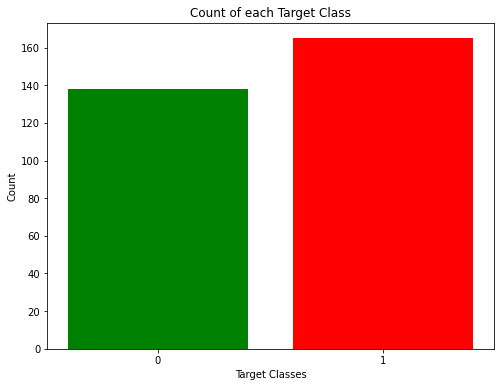

In [9]:
#Checking the Dataset is Balanced or not 
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(),dataset['target'].value_counts(),color=['red','green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

## Data Processing

In [10]:
#Feature Scaling 
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [12]:
# Splitting the dataset into the Training set and Test set
x = dataset.drop(['target'], axis = 1)
y = dataset['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

## KNN

In [13]:
# Fitting K-Neighbors Classification to the Training set
knn_scores = []
for k in range(1,16):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

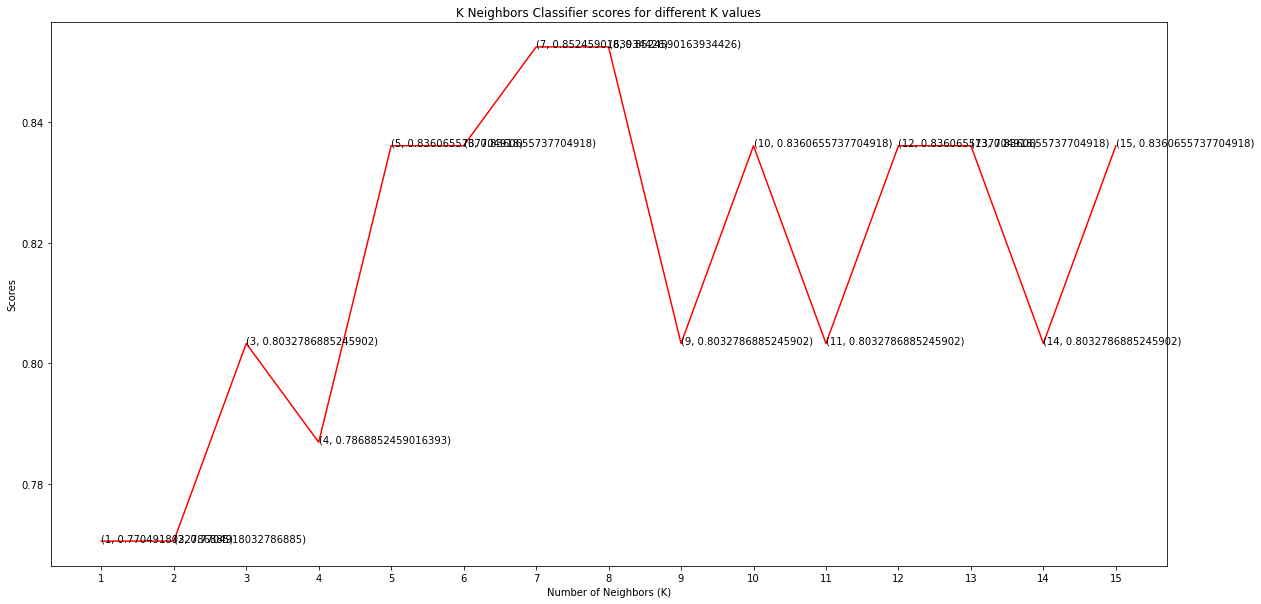

In [14]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1, 16)], knn_scores, color = 'red')
for i in range(1,16):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 16)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [15]:
# Fitting K-Neighbors Classification to the Training set with k=12
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [16]:
# Predicting the Test set results
y_pred = knn_classifier.predict(x_test)
#print(y_pred)

In [17]:
# Accuracy Score
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8360655737704918


In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[20  7]
 [ 3 31]]


In [19]:
#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



In [20]:
#testing
arr = [65,1,0,145,233,1,2,150,1,2.3,3,0,7]
inputFeature = np.asarray(arr).reshape(1, -1)
print(inputFeature.shape)
prediction = knn_classifier.predict(inputFeature)
print(prediction)

(1, 13)
[1]


In [21]:
#converting to pickel file
import pickle
with open('knn_heart.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)